# Exercise 2 – Determining the spreading of epidemics

### Federico Agostini, Federico Bottaro, Gianmarco Pompeo 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx

In [2]:
# create adjacency matrix for network A
index_i, index_j = np.loadtxt("net1.txt", dtype=np.int16, unpack=True)
dim = max(index_i.max(), index_j.max())+1
NetA_matrix = np.zeros((dim, dim))
for i,j in zip(index_i, index_j):
    # the adjacency matrix needs to be symmetric
    NetA_matrix[i, j] = 1
    NetA_matrix[j, i] = 1

In [3]:
# create adjacency matrix for network B
index_i, index_j = np.loadtxt("net2.txt", dtype=np.int16, unpack=True)
dim = max(index_i.max(), index_j.max())+1
NetB_matrix = np.zeros((dim, dim))
for i,j in zip(index_i, index_j):
    # the adjacency matrix needs to be symmetric
    NetB_matrix[i, j] = 1
    NetB_matrix[j, i] = 1

In [4]:
NetA = nx.from_numpy_array(NetA_matrix)
NetB = nx.from_numpy_array(NetB_matrix)

D:\Miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


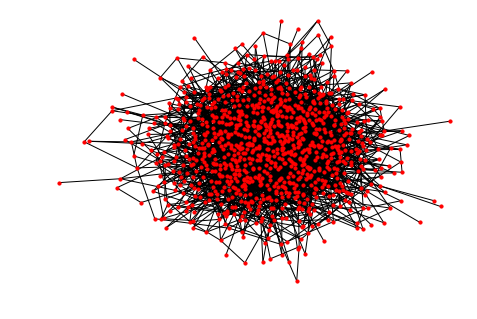

In [5]:
nx.draw(NetA, node_size=10)

D:\Miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


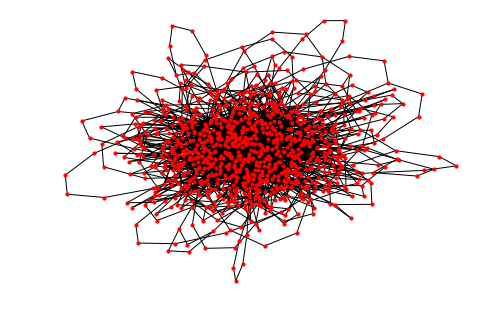

In [6]:
nx.draw(NetB, node_size=10)

## Task 1
Using the two networks provided in (A), calculate the epidemic threshold in the **SIS** dynamics for the homogenous, heterogenous and quenched mean-field approximations for $\mu=0.5$

In [7]:
# Preliminaries

mu = 0.5

## Average degree

### Network A
node_deg = NetA.degree()
node_deg = list(node_deg)
NetA_degree = np.array([x[1] for x in node_deg])
NetA_average_degree   = NetA_degree.mean() # <k_A>
NetA_average_degree_2 = np.mean(np.power(NetA_degree, 2)) # <(k_A)**2>
NetA_max_eigenvalue = np.max(np.real(np.linalg.eig(NetA_matrix)[0]))
print(NetA_max_eigenvalue)

### Network B
node_deg = NetB.degree()
node_deg = list(node_deg)
NetB_degree = np.array([x[1] for x in node_deg])
NetB_average_degree   = NetB_degree.mean() # <k_B>
NetB_average_degree_2 = np.mean(np.power(NetB_degree, 2)) # <(k_B)**2>
NetB_max_eigenvalue = np.max(np.real(np.linalg.eig(NetB_matrix)[0]))
print(NetB_max_eigenvalue)

6.284102805703304
7.530166187718354


In [8]:
# Homogeneus MF
NetA_lambda_MF = mu/NetA_average_degree
NetB_lambda_MF = mu/NetB_average_degree
print("HOMOGENEOUS MF")
print("Lambda_A =", NetA_lambda_MF)
print("Lambda_B =", NetB_lambda_MF)

HOMOGENEOUS MF
Lambda_A = 0.0971628449280995
Lambda_B = 0.13919821826280623


In [9]:
# Heterogeneous MF
NetA_lambda_HMF = mu*NetA_average_degree/NetA_average_degree_2
NetB_lambda_HMF = mu*NetB_average_degree/NetB_average_degree_2
print("HETEROGENEUOS MF")
print("Lambda_A =", NetA_lambda_HMF)
print("Lambda_B =", NetB_lambda_HMF)

HETEROGENEUOS MF
Lambda_A = 0.08160482080558198
Lambda_B = 0.07587663709336713


In [10]:
# Quenched MF
NetA_lambda_QMF = mu/NetA_max_eigenvalue
NetB_lambda_QMF = mu/NetB_max_eigenvalue
print("QUENCHED MF")
print("Lambda_A =", NetA_lambda_QMF)
print("Lambda_B =", NetB_lambda_QMF)

QUENCHED MF
Lambda_A = 0.07956585298798928
Lambda_B = 0.06639959697244084


## Task 2
Implement the (stochastic) SIS model in the two networks and simulate the entire phase diagram for $\mu=0.5$. Compare the three theoretical thresholds with the numerical results. 

*Suggestion: you need to simulate many (e.g. 100) simulations for each network and compare mean and std with the different analytical approximations.*

$$a_1 = \mu I$$
$$a_2 = \lambda \frac{I (N - I)}{N}$$

In [12]:
def A0(graph, status, m, l):
    """
    graph  = graph of the network
    status = array with status of the nodes (0-> sus, 1->inf)
    m = mu
    l = lambda
    """
    I = status.sum()
    A = [mu*I]
    for index, s in enumerate(status):
        # index of nodes connected to selected node
        connected_nodes = [n for n in graph[index]]
        # number of nodes sonnected to selected node
        N_node = len(connected_nodes)
        # number of 
        I_node = status[connected_nodes].sum()
        a = l*I_node*(N_node-I_Node)/N_node
        A.append(a)
    a0 = np.array(A).sum()
    return a0

In [13]:
# Network A

# 0 -> susceptible
# 1 -> infected
population = np.zeros(NetA_matrix.shape[0])
# infect one people at random
population[np.random.randint(0, population.shape[0])] = 1


In [87]:
np.random.seed(20190410)

In [115]:
infects = 500
initial_state=np.zeros(dim)
initial_state[np.random.choice(dim, infects, replace=False)]=1
test = np.where(initial_state == 1)[0]
np.random.choice(test), test.shape

(871, (500,))

```python
'''Gillespie'''
Lambda_test=np.linspace(0,.5,20)

iterations=1
steps=5000#10*(int(dim**0.5))

net = NetA
dim = net.number_of_nodes()
infects = dim

I_number = [infects]
connectivity = 1

Lambda_test = [0.5]

for Lamb in Lambda_test:

    for i in range(iterations):

        '''inizialization of the state (1 infected)'''
        initial_state=np.zeros(dim)
        initial_state[np.random.choice(dim, infects, replace=False)]=1
        current_state=initial_state.copy()
        
        for j in range(steps):
            print("######################Step =", j)
       
            '''evaluate aj'''
            a1= mu*current_state.sum()
            a2=(Lamb*initial_state.sum()*(dim-initial_state.sum())*connectivity)/dim
            a0=a1+a2
            
            '''calculate the time tau when the next reaction will accour'''
            tau=np.random.exponential(scale=1/a0, size=None)
            
            '''select the reaction that will accour'''
            selecter=np.random.uniform(0,1)*a0
            
            if selecter <= a1:
                print("################reaction 1")
                reaction=1
            else:
                print("################reaction 2")
                reaction=2
            
            '''apply the reaction'''
            if reaction==1:
                # find the indeces of I nodes
                I_indeces = np.where(current_state == 1)[0]
                # select 1 index at random
                I_index   = np.random.choice(I_indeces)
                # I -> S
                current_state[I_index] = 0
            
            # S + I -> I + I
            else:
                # if n_I > n_S -> search for S
                if current_state.sum() > (dim - current_state.sum()):
                    print("########n_I > n_S")
                    # find the indeces of S nodes
                    S_indeces = np.where(current_state == 0)[0]
                    np.random.shuffle(S_indeces)
                    # bool variable to check if the reaction has happened
                    reaction_found = False
                    for S_index in S_indeces:
                        # bool variable to check if a I neighbour is found
                        neighbour_found = False
                        while neighbour_found == False:
                            print("Enter while")
                            # get the list of neighbour nodes indeces
                            neighbours = np.array([n for n in net.neighbors(S_index)])
                            np.random.shuffle(neighbours)
                            # counter to check if I search throw the entire without success
                            cnt = 0
                            for k in neighbours:
                                # if the neighbour is S
                                if current_state[k] == 0:
                                    # update the counter
                                    cnt += 1
                                    continue
                                # if the neighbour is I
                                else:
                                    # change S -> I
                                    current_state[S_index] = 1
                                    reaction_found = True
                                    neighbour_found = True
                                    break
                            # if I searched throw the entire without success, exit from the 'while' loop
                            if cnt == neighbours.shape[0]:
                                #neighbour_found == True
                                break
                                print("Exit while-1")
                        print("Exit while-2")
                        # if I found the reaction, exit from 'for' loop
                        if reaction_found == True: break
                    
                # if n_I < n_S -> serch for I
                else:
                    print("########n_I < n_S")
                    # find the indeces of I nodes
                    I_indeces = np.where(current_state == 1)[0]
                    np.random.shuffle(I_indeces)
                    # bool variable to check if the reaction has happened
                    reaction_found = False
                    for I_index in I_indeces:
                        # bool variable to check if a S neighbour is found
                        neighbour_found = False
                        while neighbour_found == False:
                            print("Enter while")
                            # get the list of neighbour nodes indeces
                            neighbours = np.array([n for n in net.neighbors(I_index)])
                            np.random.shuffle(neighbours)
                            # counter to check if I search throw the entire without success
                            cnt = 0
                            for k in neighbours:
                                # if the neighbour is I
                                if current_state[k] == 1:
                                    # update the counter
                                    cnt += 1
                                    continue
                                # if the neighbour is S
                                else:
                                    # change S -> I
                                    current_state[k] = 1
                                    reaction_found = True
                                    neighbour_found = True
                                    break
                            # if I searched throw the entire without success, exit from the 'while' loop
                            if cnt == neighbours.shape[0]: 
                                #neighbour_found == True
                                break
                                print("Exit while-1")
                        # if I found the reaction, exit from 'for' loop
                        print("Exit while-2")
                        if reaction_found == True: break
            I_number.append(current_state.sum())
            print(current_state.sum())
```

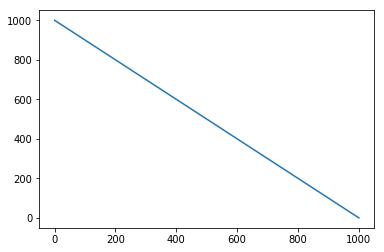

In [106]:
plt.plot(I_number)

In [130]:
'''Gillespie 2.0'''
Lambda_test=np.linspace(0,.5,20)

iterations=1
steps=5000#10*(int(dim**0.5))

net = NetA
dim = net.number_of_nodes()
infects = 50

I_number = [infects]

l = 0.2
n_steps = 5000

state = np.zeros(dim)
# put Infected in the network
state[np.random.choice(dim, infects, replace=False)] = 1
for steps in range(n_steps):
    n_I = state.sum() # #Infected
    n_S = dim - n_I
    n_N = dim
    a1  = mu*n_I
    a2  = l*n_I*n_S/n_N
    a0  = a1+a2
    p_a1= a1/a0
    #print("Prob of raction 1 =", p_a1)
    # select the reaction
    # reaction 1
    if np.random.rand() < p_a1:
        # select I at random
        I_index    = np.where(state == 1)[0]
        I_selected = np.random.choice(I_index)
        #print("I_selected =", I_selected)
        # I -> S
        state[I_selected] = 0
    
    # reaction 2
    else:
        # select I at random
        I_index    = np.where(state == 1)[0]
        np.random.shuffle(I_index)
        for k in I_index:
            neighbours = np.array([n for n in net.neighbors(k)])
            nn_infected = state[neighbours].sum()
            if nn_infected == len(neighbours): 
                break
            else:
                np.random.shuffle(neighbours)
                for NNs in neighbours:
                    if state[NNs] == 0:
                        state[NNs] = 1
                        break
    I_number.append(state.sum())
        

(536, 541)

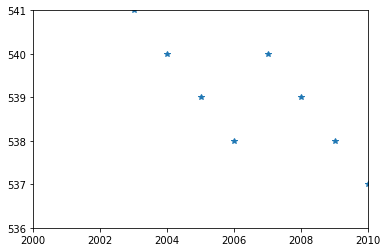

In [137]:
plt.plot(I_number, "*")
plt.xlim(2000, 2010)
plt.ylim(536,541)

## Task 3
Characterize the two networks in terms of their connectivity, degree distribution, page-rank distribution, clustering coefficient. Comment the results at the light of point 2 (e.g. how structural properties of the networks and results of the epidemic dynamics are related?)

In [14]:
'''connected component'''
print("number of connected component:")
print("Network A: ",nx.number_connected_components(NetA))
print("Network B: ",nx.number_connected_components(NetB))

number of connected component:
Network A:  1
Network B:  1


In [15]:
'''connectivity'''
print("Network A: ",nx.edge_connectivity(NetA))
print("Network B: ",nx.edge_connectivity(NetB))

Network A:  1
Network B:  2


Network A: 


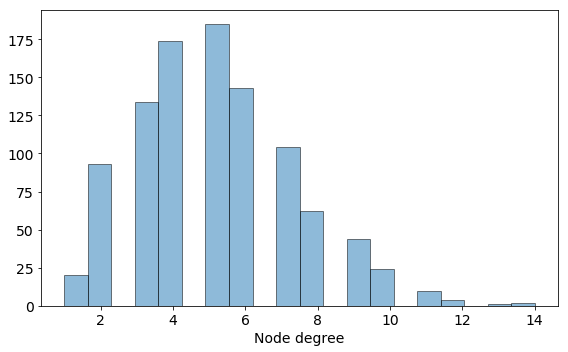

Network B: 


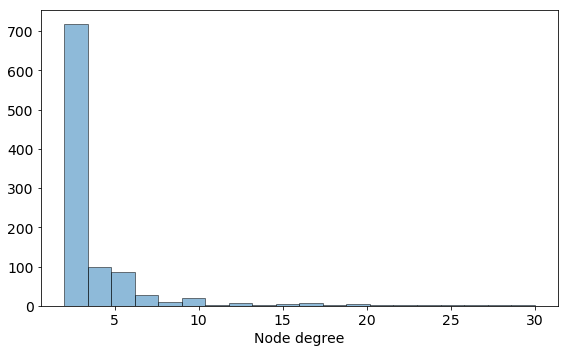

In [16]:
'''node degree'''
print("Network A: ")
node_deg = NetA.degree()
node_deg = list(node_deg)
deg = [x[1] for x in node_deg]

# plot the node degree distribution as histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(deg, bins=20, histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Node degree", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.show()

'''node degree'''
print("Network B: ")
node_deg = NetB.degree()
node_deg = list(node_deg)
deg = [x[1] for x in node_deg]

# plot the node degree distribution as histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(deg, bins=20, histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Node degree", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.show()

Network A: 


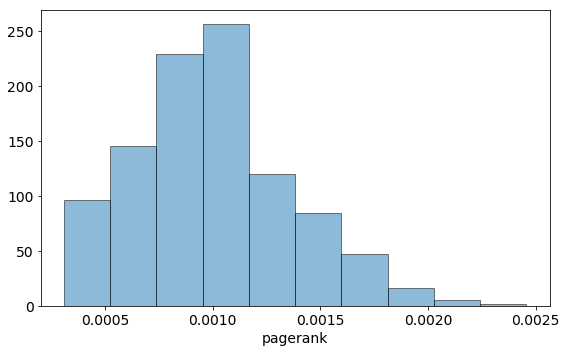

Network B: 


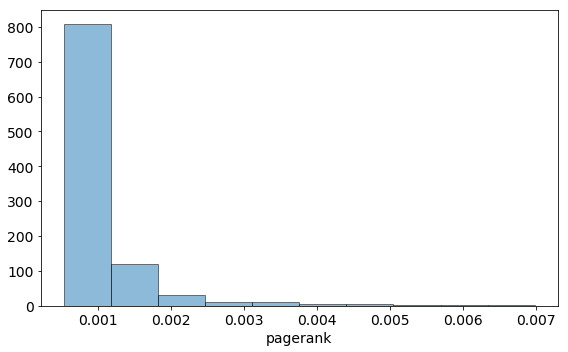

In [17]:
'''pagerank'''
print("Network A: ")
pagerankA=nx.pagerank(NetA).values()

fig, ax = plt.subplots(figsize=(8,5))
ax.hist(pagerankA, histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("pagerank", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.show()

print("Network B: ")
pagerankB=nx.pagerank(NetB).values()

fig, ax = plt.subplots(figsize=(8,5))
ax.hist(pagerankB, histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("pagerank", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.show()

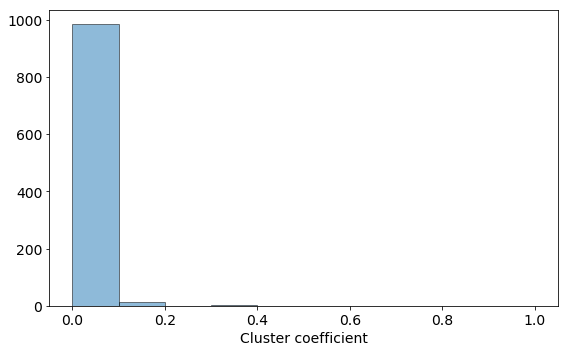

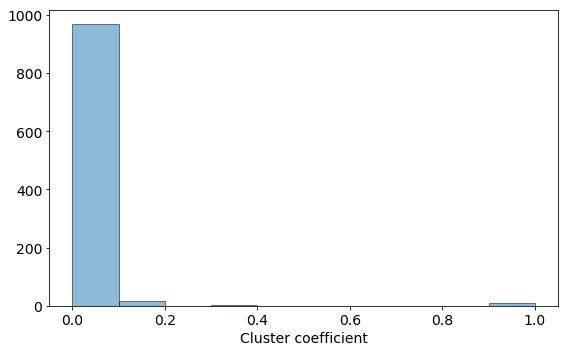

In [18]:
'''clustering coefficient'''
cluster_coeff = nx.clustering(NetA)
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(cluster_coeff.values(), histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Cluster coefficient", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.show()

cluster_coeff = nx.clustering(NetB)
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(cluster_coeff.values(), histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Cluster coefficient", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.show()